In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
topo = open("/Users/ecem/Desktop/topography.xyz","r").read()
print(topo[0:100])

31	42	0
31.0008333333	42	0
31.0016666667	42	0
31.0025	42	0
31.0033333333	42	0
31.0041666667	42	0
31.


In [9]:
splitted_topo = topo.split("\n")[:-1]
x = []; y = []; z = []
for element in splitted_topo:
    a, b, c = element.split("\t")
    a = float(a); b = float(b); c = float(c)
    x.append(a); y.append(b); z.append(c)


In [10]:
height = np.array(z) 
x = np.array(x)
y = np.array(y)

x = x.reshape((3601,3601))
y = y.reshape((3601,3601))

In [11]:
topomap = height.reshape((3601,3601))

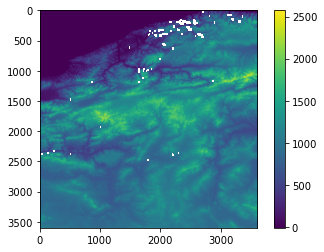

In [12]:
plt.imshow(topomap)
plt.colorbar()

## Interpolation:

In [13]:
missing_indices = np.isnan(height) # Find the indices of the missing values in x

In [14]:
# Create a new array with the missing values replaced by linearly interpolated values
nan_height = np.interp(np.where(missing_indices)[0], np.where(~missing_indices)[0], height[~missing_indices])

In [15]:
# Replace the missing values with the interpolated values
height[missing_indices] = nan_height

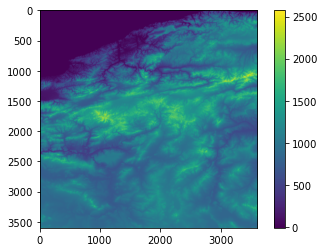

In [16]:
plt.imshow(height.reshape(((3601,3601))))
plt.colorbar()

## Cropping:


In [17]:
def topographyCropper(topography, point1, point2):
    """
    Top left and bottom right points' coordinates are expected.
    """
    
    splitted_topo = topography.split("\n")[:-1]
    x = []; y = []; z = []
    
    for element in splitted_topo:
        a, b, c = element.split("\t")
        a = float(a); b = float(b); c = float(c)
        x.append(a); y.append(b); z.append(c)
    
    height = np.array(z); x = np.array(x); y = np.array(y)
    x = x.reshape((3601,3601))
    y = y.reshape((3601,3601))
    indexy = y.T
    topomap = height.reshape((3601,3601))
    
    p1index = (np.where(x[0] == point1[0])[0][0], np.where(indexy[0] == point1[1])[0][0])
    p2index = (np.where(x[0] == point2[0])[0][0], np.where(indexy[0] == point2[1])[0][0])
    
    cropped_topo = np.zeros((p2index[0] - p1index[0], p2index[1] - p1index[1]))
    
    alpha = 0
    for y in range(p1index[1], p2index[1]):
        cropped_topo[alpha][:] = topomap[y][p1index[0]:p2index[0]]
        alpha += 1
        
    return cropped_topo

In [18]:
p1 = (x[0][500], y[1500][0])
p1

(31.4166666667, 40.75)

In [19]:
p2 = (x[0][1000], y[2000][0])
p2

(31.8333333333, 40.3333333333)

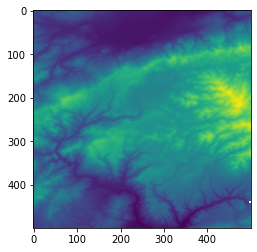

In [20]:
plt.imshow(topographyCropper(topo, p1, p2))